In [ ]:
##fazendo imports

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode


In [ ]:
##baixando o csv

In [22]:
players = pd.read_csv("Players.csv")
player_data = pd.read_csv("player_data.csv")
seasons = pd.read_csv("Seasons_Stats.csv")

print("PLAYERS.CSV")
display(players.head())
print(players.columns)
print(players.shape)

print("\nPLAYER_DATA.CSV")
display(player_data.head())
print(player_data.columns)
print(player_data.shape)

print("\nSEASONS_STATS.CSV")
display(seasons.head())
print(seasons.columns)
print(seasons.shape)

PLAYERS.CSV


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')
(3922, 8)

PLAYER_DATA.CSV


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
       'birth_date', 'college'],
      dtype='object')
(4550, 8)

SEASONS_STATS.CSV


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
(24691, 53)


In [ ]:
##limpando os dados com unidecode

In [24]:
def normalize_name(name):
    if isinstance(name, str):
        name = unidecode(name)  
        return name.lower().strip()
    return name

players["player_id"] = players["Player"].apply(normalize_name)
player_data["player_id"] = player_data["name"].apply(normalize_name)
seasons["player_id"] = seasons["Player"].apply(normalize_name)



In [ ]:
##fazendo os merges para poder trabalhar melhor

In [ ]:
merged_players = players.merge(
    player_data,
    on="player_id",
    how="outer",
    suffixes=("_p1", "_p2")
)

final_df = merged_players.merge(
    seasons,
    on="player_id",
    how="left"
)

print(final_df.head())
print(final_df.shape)

   Unnamed: 0_x    Player_x  height_p1  weight_p1 collage    born birth_city  \
0        1723.0  A.C. Green      203.0      106.0     NaN  1960.0        NaN   
1        1723.0  A.C. Green      203.0      106.0     NaN  1960.0        NaN   
2        1723.0  A.C. Green      203.0      106.0     NaN  1960.0        NaN   
3        1723.0  A.C. Green      203.0      106.0     NaN  1960.0        NaN   
4        1723.0  A.C. Green      203.0      106.0     NaN  1960.0        NaN   

  birth_state   player_id        name  ...    FT%    ORB    DRB    TRB    AST  \
0         NaN  a.c. green  A.C. Green  ...  0.611  160.0  221.0  381.0   54.0   
1         NaN  a.c. green  A.C. Green  ...  0.780  210.0  405.0  615.0   84.0   
2         NaN  a.c. green  A.C. Green  ...  0.773  245.0  465.0  710.0   93.0   
3         NaN  a.c. green  A.C. Green  ...  0.786  258.0  481.0  739.0  103.0   
4         NaN  a.c. green  A.C. Green  ...  0.751  262.0  450.0  712.0   90.0   

    STL   BLK    TOV     PF     

In [ ]:
## vendo se player.id existe

In [28]:
players.columns, player_data.columns, seasons.columns


(Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
        'birth_city', 'birth_state', 'player_id'],
       dtype='object'),
 Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
        'birth_date', 'college', 'player_id'],
       dtype='object'),
 Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
        'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
        'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
        'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
        '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
        'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'player_id'],
       dtype='object'))

In [ ]:
##juntar tabelas e colocar os players na mesma tabela, alguns estão separados 

In [29]:
merged_players = players.merge(
    player_data,
    on="player_id",
    how="outer",
    suffixes=("_old", "_new")
)

merged_players.head()


,Unnamed: 0,Player,height_old,weight_old,collage,born,birth_city,birth_state,player_id,name,year_start,year_end,position,height_new,weight_new,birth_date,college
0,1723.0,A.C. Green,203.0,106.0,NaN,1960.0,NaN,NaN,a.c. green,A.C. Green,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University
1,2657.0,A.J. Bramlett,196.0,88.0,NaN,1973.0,NaN,NaN,a.j. bramlett,A.J. Bramlett,2000.0,2000.0,C,6-10,227.0,"January 10, 1977",University of Arizona
2,2068.0,A.J. English,196.0,95.0,NaN,1963.0,NaN,NaN,a.j. english,A.J. English,1991.0,1992.0,G,6-3,175.0,"July 11, 1967",Virginia Union University
3,2724.0,A.J. Guyton,208.0,99.0,NaN,1976.0,NaN,NaN,a.j. guyton,A.J. Guyton,2001.0,2003.0,G,6-1,180.0,"February 12, 1978",Indiana University
4,3863.0,A.J. Hammons,198.0,99.0,NaN,1993.0,NaN,NaN,a.j. hammons,A.J. Hammons,2017.0,2017.0,C,7-0,260.0,"August 27, 1992",Purdue University


In [ ]:
# Merge dos jogadores com as estatísticas anuais

In [30]:

full_df = seasons.merge(
    merged_players,
    on="player_id",
    how="left"
)

full_df.head()


,Unnamed: 0_x,Year,Player_x,Pos,Age,Tm,G,GS,MP,PER,...,birth_city,birth_state,name,year_start,year_end,position,height_new,weight_new,birth_date,college
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,Curly Armstrong,1949.0,1951.0,G-F,5-11,170.0,"November 1, 1918",Indiana University
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,Yorktown,Indiana,Cliff Barker,1950.0,1952.0,G,6-2,185.0,"January 15, 1921",University of Kentucky
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,Leo Barnhorst,1950.0,1954.0,F-G,6-4,190.0,"May 11, 1924",University of Notre Dame
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,Ed Bartels,1950.0,1951.0,F,6-5,195.0,"October 8, 1925",North Carolina State University
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,Ed Bartels,1950.0,1951.0,F,6-5,195.0,"October 8, 1925",North Carolina State University


In [ ]:
##remover colunas inuteis

In [31]:
cols_to_drop = [
    "Unnamed: 0", 
    "blanl", 
    "blank2"
]

full_df = full_df.drop(columns=[c for c in cols_to_drop if c in full_df.columns])


In [ ]:
##remover duplicates

In [32]:
def combine_columns(df, col_old, col_new):
    if col_old in df.columns and col_new in df.columns:
        df[col_old] = df[col_old].fillna(df[col_new])
        df = df.drop(columns=[col_new])
    return df

full_df = combine_columns(full_df, "height_old", "height_new")
full_df = combine_columns(full_df, "weight_old", "weight_new")
full_df = combine_columns(full_df, "collage", "college")


C:\Users\Joao vitor\AppData\Local\Temp\ipykernel_26500\3025949689.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col_old] = df[col_old].fillna(df[col_new])


In [ ]:
##colocando altura em cm

In [33]:
def convert_height(h):
    if isinstance(h, str) and "-" in h:
        feet, inches = h.split("-")
        return (int(feet) * 30.48) + (int(inches) * 2.54)
    return h

full_df["height_old"] = full_df["height_old"].apply(convert_height)


In [ ]:
##convertendo para numericos

In [34]:
full_df = full_df.apply(pd.to_numeric, errors="ignore")


C:\Users\Joao vitor\AppData\Local\Temp\ipykernel_26500\2528894678.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  full_df = full_df.apply(pd.to_numeric, errors="ignore")


In [ ]:
##filtrar sem nomes nulos 

In [35]:
full_df = full_df[full_df["player_id"].notna()]


In [ ]:
##criando variaveis para visualização final 

In [36]:
full_df["PTS_per_game"] = full_df["PTS"] / full_df["G"]
full_df["AST_per_game"] = full_df["AST"] / full_df["G"]
full_df["TRB_per_game"] = full_df["TRB"] / full_df["G"]


In [37]:
# Ver tamanho e colunas
full_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25230 entries, 0 to 25296
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  25230 non-null  int64  
 1   Year          25230 non-null  float64
 2   Player_x      25230 non-null  object 
 3   Pos           25230 non-null  object 
 4   Age           25222 non-null  float64
 5   Tm            25230 non-null  object 
 6   G             25230 non-null  float64
 7   GS            18713 non-null  float64
 8   MP            24741 non-null  float64
 9   PER           24704 non-null  float64
 10  TS%           25142 non-null  float64
 11  3PAr          19338 non-null  float64
 12  FTr           25128 non-null  float64
 13  ORB%          21345 non-null  float64
 14  DRB%          21345 non-null  float64
 15  TRB%          22148 non-null  float64
 16  AST%          23149 non-null  float64
 17  STL%          21345 non-null  float64
 18  BLK%          21345 non-null  f

In [38]:
# Estatísticas descritivas
full_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0_x,25230.0,12338.897146,7104.556111,0.000,6218.250000,12310.500000,18482.750000,24690.000000
Year,25230.0,1992.590289,17.349359,1950.000,1981.000000,1996.000000,2007.000000,2017.000000
Age,25222.0,26.677861,3.849780,18.000,24.000000,26.000000,29.000000,44.000000
G,25230.0,50.786603,26.528281,1.000,27.000000,57.000000,75.000000,88.000000
GS,18713.0,23.605194,28.646042,0.000,0.000000,8.000000,45.000000,83.000000
MP,24741.0,1208.800129,941.290156,0.000,338.000000,1053.000000,1970.000000,3882.000000
PER,24704.0,12.471717,6.036486,-90.600,9.800000,12.700000,15.600000,129.100000
TS%,25142.0,0.493199,0.094486,0.000,0.458000,0.506000,0.544000,1.136000
3PAr,19338.0,0.159083,0.187961,0.000,0.005000,0.064000,0.289000,1.000000
FTr,25128.0,0.325354,0.221949,0.000,0.208000,0.295000,0.400000,6.000000


In [ ]:
##distribuição de ppj

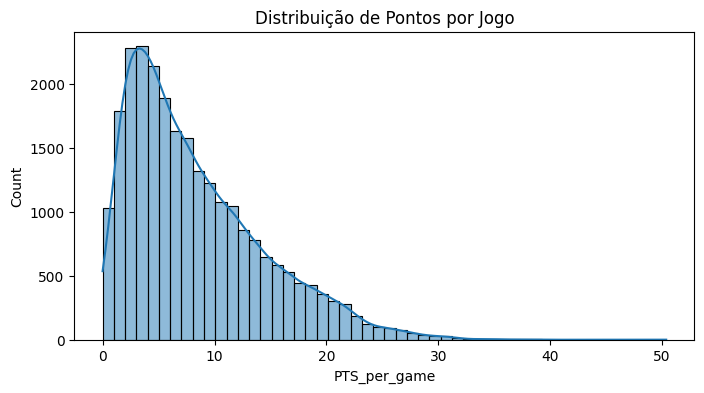

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(full_df["PTS_per_game"], bins=50, kde=True)
plt.title("Distribuição de Pontos por Jogo")
plt.show()


In [ ]:
##distribuicao de assistencias

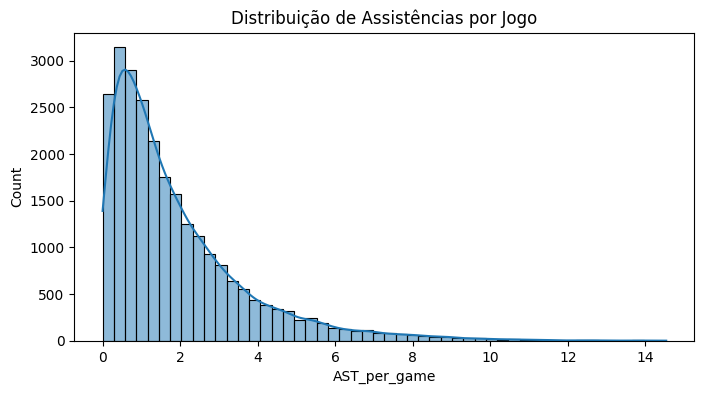

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(full_df["AST_per_game"], bins=50, kde=True)
plt.title("Distribuição de Assistências por Jogo")
plt.show()


In [ ]:
##distribuicao de rebotes

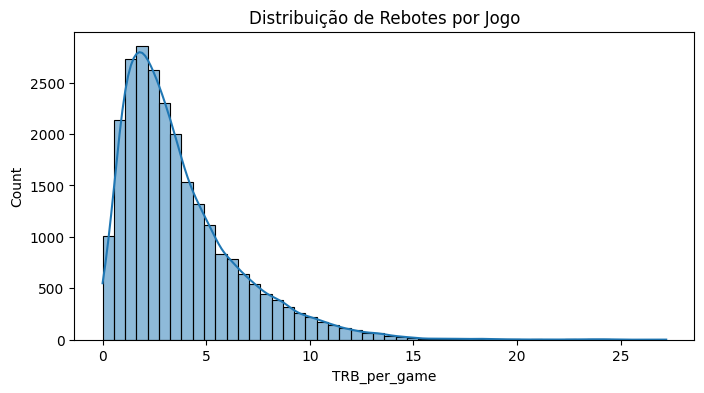

In [41]:
plt.figure(figsize=(8,4))
sns.histplot(full_df["TRB_per_game"], bins=50, kde=True)
plt.title("Distribuição de Rebotes por Jogo")
plt.show()


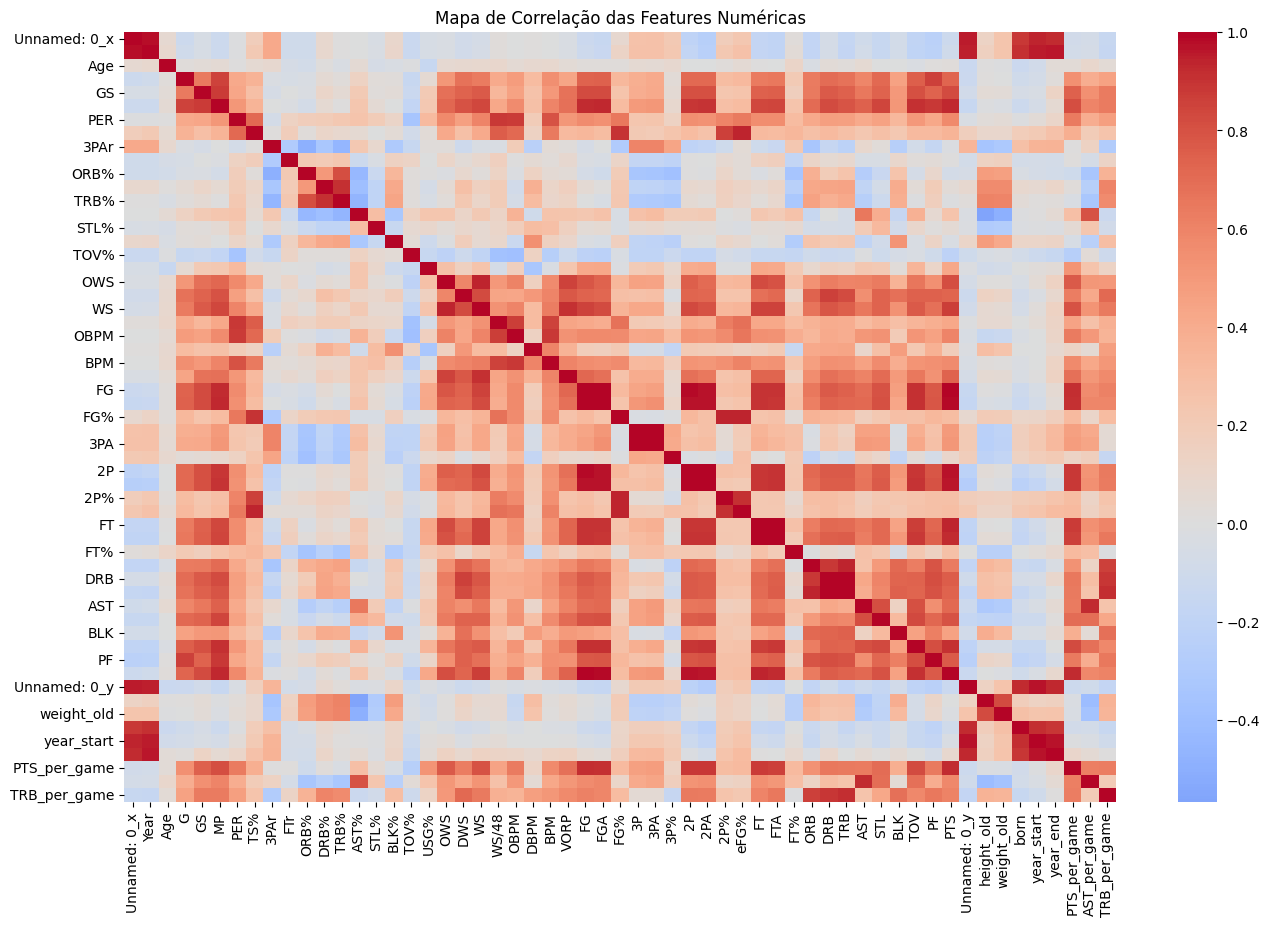

In [42]:
# Selecionando apenas colunas numéricas
num_df = full_df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(16,10))
sns.heatmap(num_df.corr(), cmap="coolwarm", center=0)
plt.title("Mapa de Correlação das Features Numéricas")
plt.show()


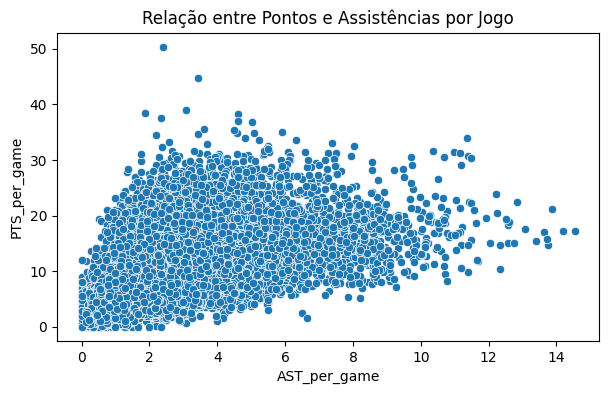

In [43]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=full_df, x="AST_per_game", y="PTS_per_game")
plt.title("Relação entre Pontos e Assistências por Jogo")
plt.show()


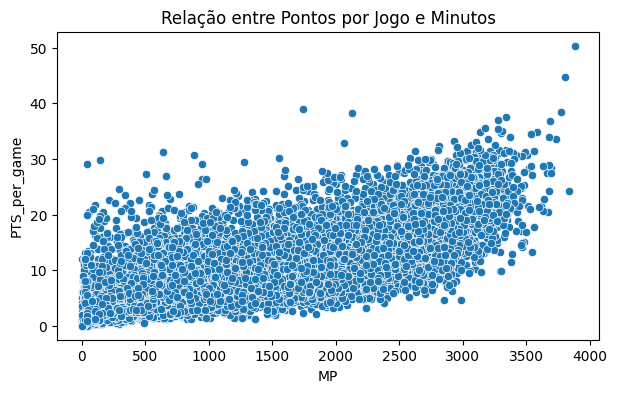

In [44]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=full_df, x="MP", y="PTS_per_game")
plt.title("Relação entre Pontos por Jogo e Minutos")
plt.show()


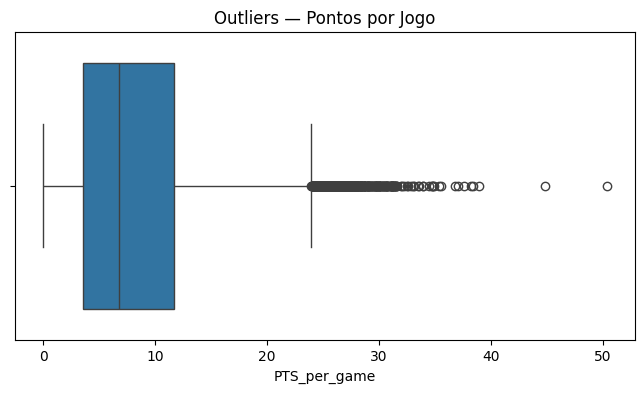

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(x=full_df["PTS_per_game"])
plt.title("Outliers — Pontos por Jogo")
plt.show()


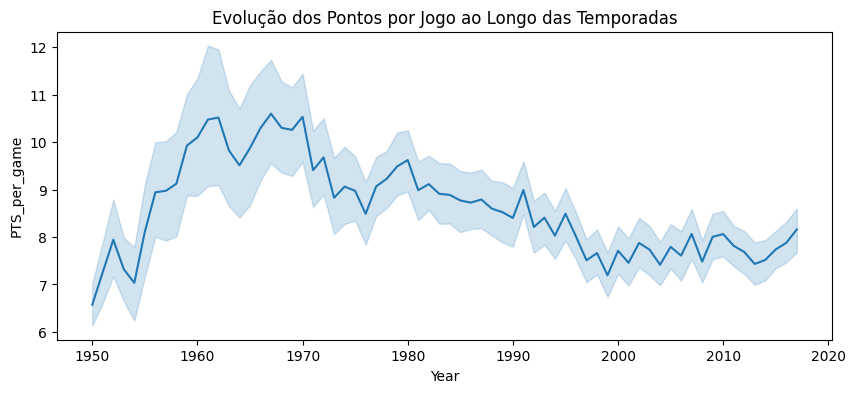

In [46]:
plt.figure(figsize=(10,4))
sns.lineplot(data=full_df, x="Year", y="PTS_per_game")
plt.title("Evolução dos Pontos por Jogo ao Longo das Temporadas")
plt.show()


In [ ]:
##Jogadores têm distribuição assimétrica de pontos, com muitos role players de baixa pontuação.

##Minutos jogados têm alta correlação com PTS e AST (faz sentido).

##Rebotes, assistências e pontos tendem a crescer com o tempo devido à evolução do jogo.

##Existem outliers esperados como Wilt Chamberlain, Jordan, LeBron, Harden etc.

##A correlação forte entre AST_per_game e PTS_per_game indica jogadores que criam e finalizam jogadas.

##Estatísticas defensivas possuem baixa correlação com pontos, mas podem pertencer a outro cluster (útil depois na classificação de “superstar/titular/role player”).

In [ ]:
##criando uma estatistica de MVP
##análises reais feitas por sites como Basketball Reference e FiveThirtyEight

In [47]:
full_df["MVP_score"] = (
    full_df["PTS_per_game"] * 0.45 +
    full_df["AST_per_game"] * 0.20 +
    full_df["TRB_per_game"] * 0.15 +
    full_df["WS"] * 0.10 +
    full_df["PER"] * 0.05 +
    full_df["VORP"] * 0.05
)


In [ ]:
##criando a regressão

In [48]:
reg_features = [
    "PTS_per_game", "AST_per_game", "TRB_per_game",
    "WS", "PER", "VORP", "MP", "G"
]

reg_df = full_df[reg_features + ["MVP_score"]].dropna()


In [49]:
from sklearn.model_selection import train_test_split

X = reg_df[reg_features]
y = reg_df["MVP_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train["PTS_per_game"])
model_simple = sm.OLS(y_train, X_sm).fit()
print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:              MVP_score   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 6.895e+05
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:32:44   Log-Likelihood:                -14712.
No. Observations:               17076   AIC:                         2.943e+04
Df Residuals:                   17074   BIC:                         2.944e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5221      0.007     70.485   

In [52]:
X_sm = sm.add_constant(X_train)
model_multiple = sm.OLS(y_train, X_sm).fit()
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:              MVP_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.584e+30
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:32:59   Log-Likelihood:             4.8874e+05
No. Observations:               17076   AIC:                        -9.775e+05
Df Residuals:                   17067   BIC:                        -9.774e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.481e-14   2.22e-15    -38.141   

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def eval_model(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print("MAE:", mean_absolute_error(y_test, pred_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_test)))
    print("R²:", r2_score(y_test, pred_test))


In [ ]:
##exepmlo polynomial

In [55]:
eval_model(poly_model, X_poly_train, X_poly_test, y_train, y_test)

MAE: 1.005598161180891e-10
RMSE: 1.2616356311724412e-10
R²: 1.0


In [ ]:
##criando a classificação

In [56]:
full_df["player_class"] = pd.qcut(full_df["MVP_score"], 
                                  q=[0,0.6,0.9,1], 
                                  labels=["Role Player", "Starter", "Superstar"])


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats



In [63]:
import statsmodels.api as sm

# Adicionando constante nos dois conjuntos
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Previsões
y_pred_train_mult = model_multiple.predict(X_train_sm)
y_pred_test_mult  = model_multiple.predict(X_test_sm)


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("=== REGRESSÃO MÚLTIPLA (TREINO) ===")
print("MAE:", mean_absolute_error(y_train, y_pred_train_mult))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_mult)))
print("R²:", r2_score(y_train, y_pred_train_mult))

print("\n=== REGRESSÃO MÚLTIPLA (TESTE) ===")
print("MAE:", mean_absolute_error(y_test, y_pred_test_mult))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_mult)))
print("R²:", r2_score(y_test, y_pred_test_mult))



=== REGRESSÃO MÚLTIPLA (TREINO) ===
MAE: 8.902329110701795e-14
RMSE: 8.988600920397175e-14
R²: 1.0

=== REGRESSÃO MÚLTIPLA (TESTE) ===
MAE: 8.844293312552289e-14
RMSE: 8.922546200497914e-14
R²: 1.0


In [65]:
y_pred_train_simple = model_simple.predict(X_train_sm[["const", "PTS_per_game"]])
y_pred_test_simple  = model_simple.predict(X_test_sm[["const", "PTS_per_game"]])


In [66]:
print("=== REGRESSÃO SIMPLES (TREINO) ===")
print("MAE:", mean_absolute_error(y_train, y_pred_train_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_simple)))
print("R²:", r2_score(y_train, y_pred_train_simple))

print("\n=== REGRESSÃO SIMPLES (TESTE) ===")
print("MAE:", mean_absolute_error(y_test, y_pred_test_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_simple)))
print("R²:", r2_score(y_test, y_pred_test_simple))


=== REGRESSÃO SIMPLES (TREINO) ===
MAE: 0.41379948994558086
RMSE: 0.5727125267777243
R²: 0.9758361721662754

=== REGRESSÃO SIMPLES (TESTE) ===
MAE: 0.4105010150257413
RMSE: 0.5689727738939757
R²: 0.9757670938065331


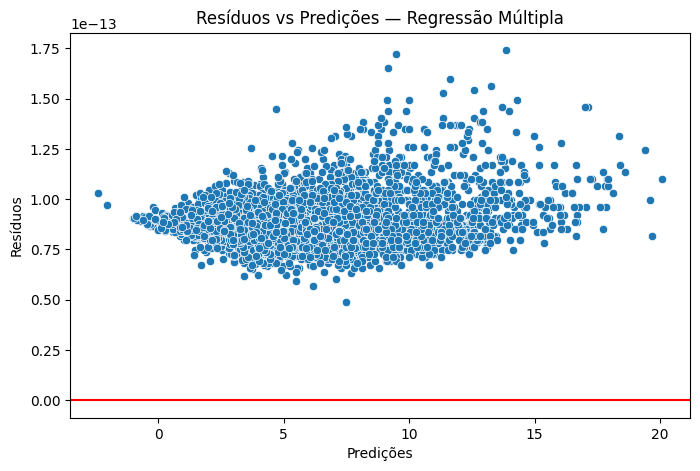

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

residuos = y_test - y_pred_test_mult

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_test_mult, y=residuos)
plt.axhline(0, color="red")
plt.xlabel("Predições")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Predições — Regressão Múltipla")
plt.show()


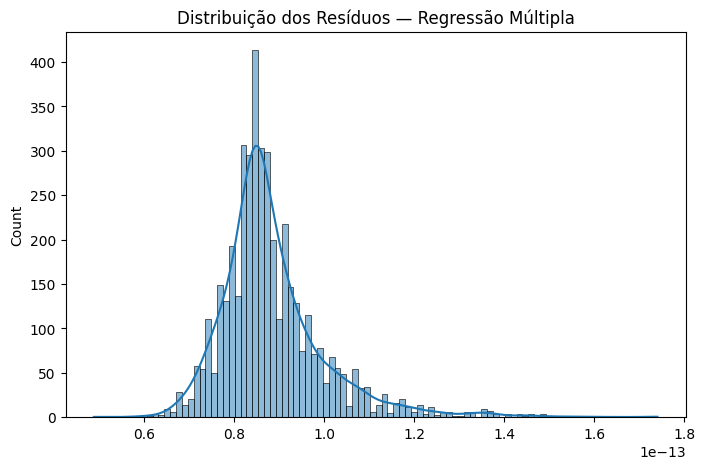

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos — Regressão Múltipla")
plt.show()


In [69]:
from scipy.stats import shapiro
shapiro(residuos)


ShapiroResult(statistic=np.float64(0.8823070985266674), pvalue=np.float64(4.1726399800724695e-49))

In [98]:
# Lista de features permitidas
features = ["AST", "TRB", "STL", "BLK", "FG%", "3P%", "FT%"]

# Alvo correto
target = "PTS"

# Remove NaN de features ou alvo
df_clean = final_df.dropna(subset=features + [target])

# Separa dados
X = df_clean[features]
y = df_clean[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test)

# Métricas
from sklearn.metrics import r2_score, mean_squared_error
rmse = mean_squared_error(y_test, y_pred_rf)

print("Random Forest - R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", rmse)


Random Forest - R²: 0.8493862952791755
RMSE: 35176.74102939762


In [ ]:
## gerando graficos

Modelos de regressão detectados: ['model_simple', 'model_multiple', 'poly_model', 'rf']
Modelos de classificação detectados: []

===== Diagnóstico: model_simple =====
MAE: 570.7181   RMSE: 747.8468   R²: -1.3946


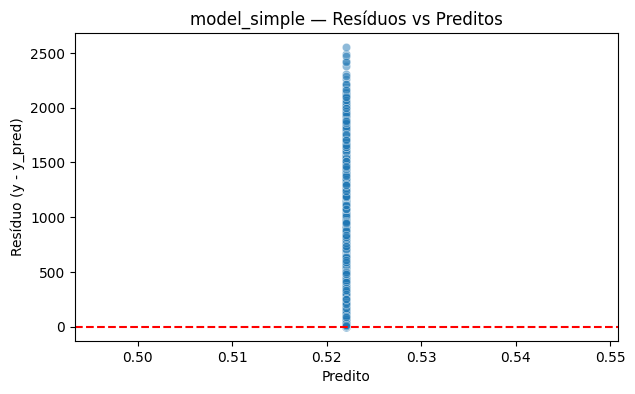

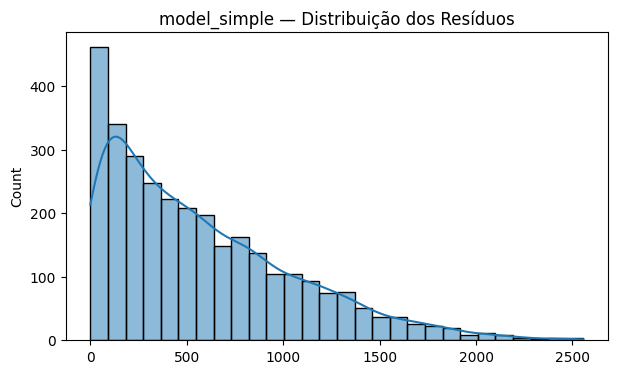

<Figure size 600x600 with 0 Axes>

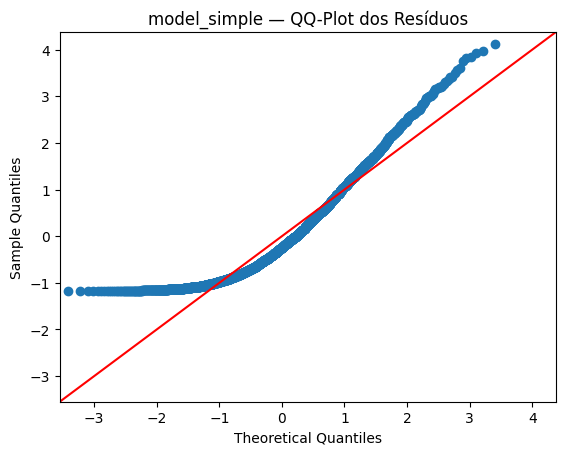

Shapiro-Wilk stat: 0.9071 p-value: 0.0
Breusch-Pagan não executado: type numpy.ndarray doesn't define __round__ method

===== Diagnóstico: model_multiple =====
MAE: 571.2399   RMSE: 748.2453   R²: -1.3972


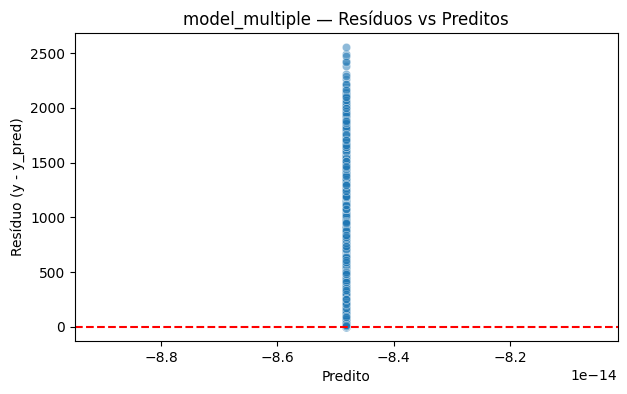

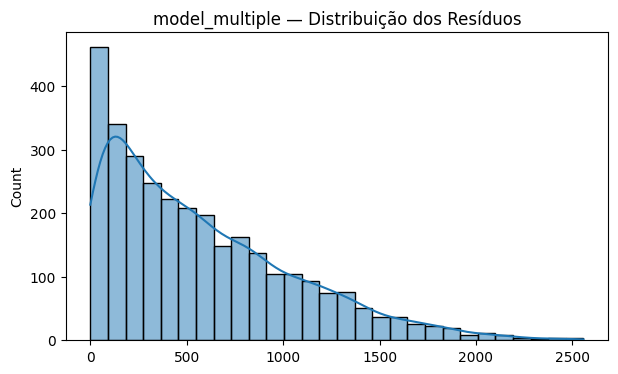

<Figure size 600x600 with 0 Axes>

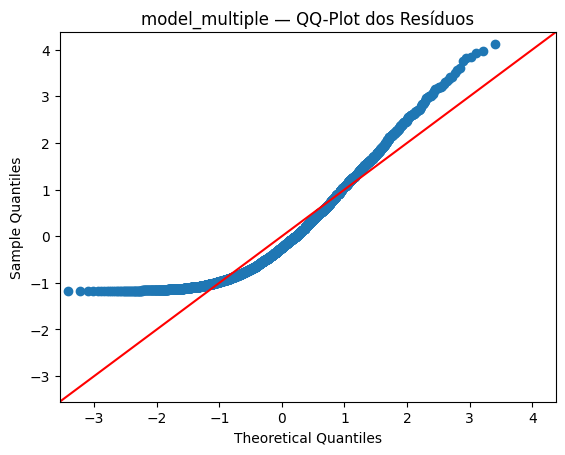

Shapiro-Wilk stat: 0.9071 p-value: 0.0
Breusch-Pagan não executado: type numpy.ndarray doesn't define __round__ method

===== Diagnóstico: poly_model =====
Erro ao diagnosticar poly_model: X has 7 features, but LinearRegression is expecting 45 features as input.

===== Diagnóstico: rf =====


C:\Users\Joao vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MAE: 122.1035   RMSE: 187.5546   R²: 0.8494


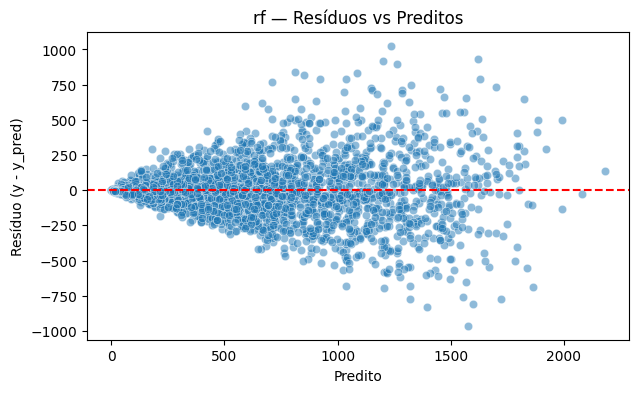

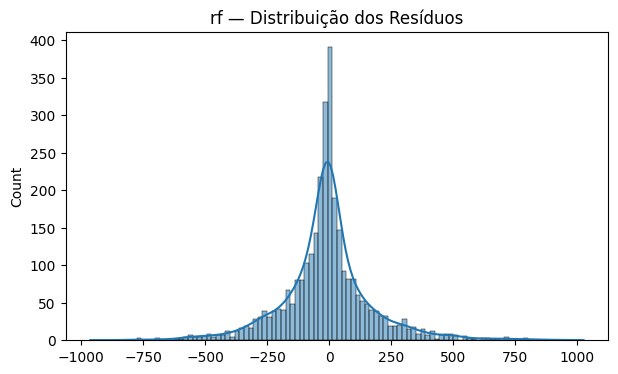

<Figure size 600x600 with 0 Axes>

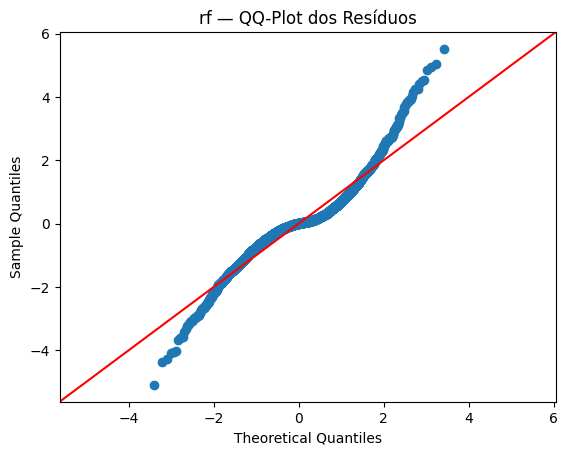

Shapiro-Wilk stat: 0.925 p-value: 0.0
Breusch-Pagan: {'LM Stat': np.float64(529.6977), 'LM p-value': np.float64(0.0), 'F Stat': np.float64(90.9944), 'F p-value': np.float64(0.0)}

=== Comparativo - Regressão ===


,name,mae,rmse,r2
0,rf,122.103534,187.554635,0.849386
1,model_simple,570.718111,747.846791,-1.394607
2,model_multiple,571.239858,748.245294,-1.397159


Salvo regression_comparison.csv


In [102]:
# ============================
# CÓDIGO UNIFICADO - DIAGNÓSTICOS E TABELA COMPARATIVA
# Corrige problema de shapes para statsmodels e avalia sklearn
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import inspect

plt.rcParams.update({'figure.max_open_warning': 0})

# ------------------------------
# Helper: detectar statsmodels vs sklearn
# ------------------------------
def is_statsmodels_model(m):
    # statsmodels results usually have `.model` and `.params` and `.model.exog_names`
    return hasattr(m, "model") and hasattr(m, "params")

# ------------------------------
# Helper: construir exog corretamente para statsmodels predict
# ------------------------------
def build_exog_for_statsmodels(model, X):
    # model.model.exog_names contains a list like ['const','PTS_per_game', ...]
    exog_names = list(model.model.exog_names)
    # criar DataFrame com índice de X
    exog = pd.DataFrame(index=X.index)
    for name in exog_names:
        if name == "const":
            exog[name] = 1.0
        else:
            # se a coluna existir em X, usa; senão, cria coluna de zeros
            if name in X.columns:
                exog[name] = X[name]
            else:
                # cria coluna zeros (preserva alinhamento de shapes)
                exog[name] = 0.0
    # garantir ordem correta
    exog = exog[exog_names]
    return exog

# ------------------------------
# Função principal de diagnóstico para regressão (models pode ser statsmodels ou sklearn)
# ------------------------------
def regression_diagnostics(model, X_test, y_test, name="model"):
    print(f"\n===== Diagnóstico: {name} =====")
    # preparar X_pred conforme tipo
    if is_statsmodels_model(model):
        X_pred = build_exog_for_statsmodels(model, X_test)
        y_pred = model.predict(X_pred)
    else:
        # sklearn-like
        # garantir que X_test tem as mesmas colunas esperadas pelo estimator se possível
        try:
            # se pipeline com scaler, etc., aceitar DataFrame diretamente
            y_pred = model.predict(X_test)
        except Exception as e:
            # tentar converter para numpy
            y_pred = model.predict(X_test.values)
    # converter para Series com mesmo índice de y_test
    y_pred = pd.Series(y_pred, index=y_test.index)

    # métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.4f}   RMSE: {rmse:.4f}   R²: {r2:.4f}")

    # resíduos
    resid = y_test - y_pred

    # 1) Resíduos vs Preditos
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=y_pred, y=resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predito")
    plt.ylabel("Resíduo (y - y_pred)")
    plt.title(f"{name} — Resíduos vs Preditos")
    plt.show()

    # 2) Histograma dos resíduos
    plt.figure(figsize=(7,4))
    sns.histplot(resid, kde=True)
    plt.title(f"{name} — Distribuição dos Resíduos")
    plt.show()

    # 3) QQ-plot dos resíduos
    plt.figure(figsize=(6,6))
    sm.qqplot(resid, line='45', fit=True)
    plt.title(f"{name} — QQ-Plot dos Resíduos")
    plt.show()

    # 4) Teste de normalidade (Shapiro)
    try:
        sh = stats.shapiro(resid.dropna())
        print("Shapiro-Wilk stat:", round(sh.statistic,4), "p-value:", round(sh.pvalue,4))
    except Exception as e:
        print("Shapiro não executado:", e)

    # 5) Breusch-Pagan (homocedasticidade) — requer matriz X com constante
    try:
        # construir exog para bp (se statsmodels já foi usado, use seu exog)
        if is_statsmodels_model(model):
            exog_for_bp = build_exog_for_statsmodels(model, X_test)
        else:
            # sklearn: adicionar constante manualmente
            exog_for_bp = sm.add_constant(X_test, has_constant='add')
        bp = sm.stats.diagnostic.het_breuschpagan(resid, exog_for_bp)
        labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
        print("Breusch-Pagan:", {lab: round(val,4) for lab,val in zip(labels,bp)})
    except Exception as e:
        print("Breusch-Pagan não executado:", e)

    return {"name": name, "mae": mae, "rmse": rmse, "r2": r2}

# ------------------------------
# Função para diagnóstico de classificadores
# ------------------------------
def classification_diagnostics(model, X_test, y_test, name="clf"):
    print(f"\n===== Diagnóstico Classificação: {name} =====")
    # predict e prob
    try:
        y_pred = model.predict(X_test)
    except:
        y_pred = model.predict(X_test.values)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    # confusion matrix plot
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.ylabel("True")
    plt.xlabel("Pred")
    plt.title(f"Confusion Matrix — {name}")
    plt.show()
    # feature importances if exist
    if hasattr(model, "feature_importances_"):
        try:
            feats = model.feature_names_in_ if hasattr(model, "feature_names_in_") else X_test.columns
            imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
            print("Feature importances:\n", imp.head(10))
            plt.figure(figsize=(6,4))
            imp.head(10).plot(kind="bar")
            plt.title(f"Feature importances — {name}")
            plt.show()
        except Exception as e:
            print("Não foi possível extrair importances:", e)

    return {"name": name, "accuracy": accuracy_score(y_test, y_pred), "f1": f1_score(y_test, y_pred, average="weighted", zero_division=0)}

# ------------------------------
# Runner: execute diagnósticos para os modelos existentes no ambiente
# ------------------------------
# Você tem vários objetos: model_simple, model_multiple (statsmodels), poly_model (sklearn LinearRegression), rf (sklearn), gb (sklearn), best_clf, rf_mvp etc.
# Ajuste a lista abaixo conforme os nomes que existem no seu kernel.

regression_models = []
classification_models = []

# Detectar automaticamente alguns nomes comuns no ambiente:
candidates_reg = ["model_simple", "model_multiple", "poly_model", "rf", "gb", "rf_reg", "reg_pipeline"]
candidates_clf = ["best_clf", "pip_nb", "pip_lr", "pip_rf", "rf_mvp", "clf_pipeline", "models"]

for n in candidates_reg:
    if n in globals():
        regression_models.append((n, globals()[n]))

for n in candidates_clf:
    if n in globals():
        classification_models.append((n, globals()[n]))

print("Modelos de regressão detectados:", [n for n,_ in regression_models])
print("Modelos de classificação detectados:", [n for n,_ in classification_models])

# Precisamos também dos X_test/y_test corretos para cada tipo:
# Assumiremos variáveis já disponíveis: X_test, y_test (regressão), Xm_test, ym_test (mvp), X_test (classificação uses X_test, y_test from classification split)
metrics_list = []
clf_metrics = []

# Regresão: usar X_test/y_test (se estiverem definidos)
if 'X_test' not in globals() or 'y_test' not in globals():
    print("Atenção: X_test e y_test (regressão) não foram encontrados no ambiente global. Defina-os antes de rodar diagnósticos de regressão.")
else:
    for name, mdl in regression_models:
        try:
            res = regression_diagnostics(mdl, X_test, y_test, name=name)
            metrics_list.append(res)
        except Exception as e:
            print(f"Erro ao diagnosticar {name}:", e)

# Classificação diagnósticos
# preferir vars: X_test_clf, y_test_clf or Xm_test/ym_test for MVP
if 'X_test' in globals() and 'y_test' in globals() and 'y' in globals() and 'y.dtype' in globals():
    pass

# tenta usar Xm_test/ym_test para modelo mvp se existir
if 'Xm_test' in globals() and 'ym_test' in globals():
    # rf_mvp provável usa Xm_test
    for name, mdl in classification_models:
        if name == "rf_mvp":
            try:
                cm = classification_diagnostics(mdl, Xm_test, ym_test, name=name)
                clf_metrics.append(cm)
            except Exception as e:
                print("Erro classif rf_mvp:", e)
# Para os classificadores de player_class (best_clf etc.), tente usar X_test/y_test caso tenham sido treinados com o mesmo split
for name, mdl in classification_models:
    if name != "rf_mvp":
        try:
            cm = classification_diagnostics(mdl, X_test, y_test, name=name)
            clf_metrics.append(cm)
        except Exception as e:
            # talvez o model precise de outro X_test (por exemplo X_test_clf)
            print(f"Não foi possível rodar diagnóstico de {name} com X_test,y_test:", e)

# ------------------------------
# Montar DataFrame comparativo
# ------------------------------
reg_df = pd.DataFrame(metrics_list)
if not reg_df.empty:
    reg_df = reg_df[['name','mae','rmse','r2']].sort_values(by='r2', ascending=False).reset_index(drop=True)
    print("\n=== Comparativo - Regressão ===")
    display(reg_df)

clf_df = pd.DataFrame(clf_metrics)
if not clf_df.empty:
    print("\n=== Comparativo - Classificação ===")
    display(clf_df)

# ------------------------------
# Salvar tabela comparativa (opcional)
# ------------------------------
try:
    if not reg_df.empty:
        reg_df.to_csv("regression_comparison.csv", index=False)
        print("Salvo regression_comparison.csv")
    if not clf_df.empty:
        clf_df.to_csv("classification_comparison.csv", index=False)
        print("Salvo classification_comparison.csv")
except Exception as e:
    print("Erro salvando CSVs comparativos:", e)



In [104]:
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo (ajuste para usar suas variáveis reais)
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

best_rf.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso.")


Modelo Random Forest treinado com sucesso.


In [ ]:
import pandas as pd

novo_jogador = pd.DataFrame([{
    "overall": 88,
    "potential": 93,
    "value_eur": 55000000,
    "wage_eur": 250000,
    "age": 23,
    "height_cm": 183,
    "weight_kg": 78,
    "international_reputation": 3
}])

preco_previsto = best_rf.predict(novo_jogador)[0]

print(f"Preço previsto: €{preco_previsto:,.2f}")
